In [ ]:
!pip install tensorflow==2.2

     |████████████████████████████████| 516.2 MB 3.9 kB/s 
     |████████████████████████████████| 454 kB 50.9 MB/s 
     |████████████████████████████████| 3.0 MB 38.4 MB/s 
     |████████████████████████████████| 2.9 MB 49.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
    Uninstalli

In [ ]:
import os
import cv2
import random
import numpy as np


img_size_100p = 128 #  dataset size jadi 100p bebas sih bisa 224 juga (untuk dipakai di Arsitektur VGG16) kalau pake 224 bakal makan memory banyak

path_train  = '/content/drive/MyDrive/Dataset Aksara Lampung/train'                           
path_test   = '/content/drive/MyDrive/Dataset Aksara Lampung/validation'                                                        
categories  = ['Ka', 'Ga', 'Nga', 'Pa', 'Ba', 'Ma', 'Ta', 'Da', 'Na', 'Ca', 'Ja', 'Nya','Ya', 'A', 'La', 'Ra', 'Sa', 'Wa', 'Ha', 'Gha']         

def create_data_img(folder_path):
    imageData = []
    for category in categories:
        path = os.path.join(folder_path, category)
        class_num = categories.index(category) # Ambil label sebagai index (number)
        for img in os.listdir(path):
            img_array   = cv2.imread(os.path.join(path, img)) 
            img_convert = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            img_resize  = cv2.resize(img_convert, (img_size_100p, img_size_100p))
            imageData.append([img_resize, class_num])
    
    return imageData

dataTrain   = create_data_img(path_train)
dataTest    = create_data_img(path_test)

# Shuffle Data Train (kalo enggak di shuffle, nanti data train ngurut berdasarkan labels, jadinya A Ba Ca gitu gitu)
random.seed(10) # 10 sebagai index shuffle, agar saat run ulang nanti hasil shuffle sama
random.shuffle(dataTrain)

In [ ]:
# X untuk Features & y untuk labels
X_train, y_train, X_test, y_test = [], [], [], []

for features, label in dataTrain:
    X_train.append(features)
    y_train.append(label)

for features, label in dataTest:
    X_test.append(features)
    y_test.append(label)

#-1 di reshape hm... pokoknya biar numpy nya nentuin dimensi datanya deh yang sesuai
X_train = np.array(X_train).reshape(-1, img_size_100p, img_size_100p, 3)
y_train = np.asarray(y_train)
X_test  = np.array(X_test).reshape(-1, img_size_100p, img_size_100p, 3)
y_test  = np.asarray(y_test)

print("X_train :", X_train.shape)
print("y_train :", y_train.shape)
print("X_test  :", X_test.shape)
print("y_test  :", y_test.shape)

X_train : (6975, 128, 128, 3)
y_train : (6975,)
X_test  : (1172, 128, 128, 3)
y_test  : (1172,)


In [ ]:
print("Isi Array X_train :\n\n", X_train[0]) # cuma buat ngabil dta contoh yg pertama ya ges yaaaa
print("\nIsi Array X_test  :\n\n", X_test[0])

def prep_pixels(train, test):
    # pokoknya ubah iteger ke float
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # ini buat jadiin range nya 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

X_train_norm, X_test_norm = prep_pixels(X_train, X_test)

print("\nIsi Array X_train_norm :\n\n", X_train_norm[0])
print("\nIsi Array X_test_norm  :\n\n", X_test_norm[0])

Isi Array X_train :

 [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [250 250 250]
  [243 243 243]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]

Isi Array X_test  :

 [[[  5   5   5]
  [  6   6   6]
  [ 10  10  10]
  ...
  [127 127 127]
  [106 106 106]
  [130 130 130]]

 [[248 248 248]
  [245 245 245]
  [249 249 249]
  ...
  [250 250 250]
  [247 247 247]
  [225 225 225]]

 [[250 250 250]
  [254 254 254]
  [254 254 254]
  ...
  [250 250 250]
  [250 250 250]
  [231 231 231]]

 ...

 [[254 

In [ ]:
from tensorflow.keras.utils import to_categorical

print("Isi Array y_train :", y_train)
print("Isi Array y_test  :", y_test)

# one hot encode target values
y_train_encode = to_categorical(y_train)
y_test_encode  = to_categorical(y_test)

print("\nIsi Array y_train_encode :\n\n", y_train_encode)
print("\nIsi Array y_test_encode :\n\n", y_test_encode)

Isi Array y_train : [ 8  7 11 ...  6  0  9]
Isi Array y_test  : [ 0  0  0 ... 19 19 19]

Isi Array y_train_encode :

 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Isi Array y_test_encode :

 [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
print("X_train_norm     :", X_train_norm.shape)
print("y_train_encode   :", y_train_encode.shape)
print("X_test_norm      :", X_test_norm.shape)
print("y_test_encode    :", y_test_encode.shape)

X_train_norm     : (6975, 128, 128, 3)
y_train_encode   : (6975, 20)
X_test_norm      : (1172, 128, 128, 3)
y_test_encode    : (1172, 20)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0

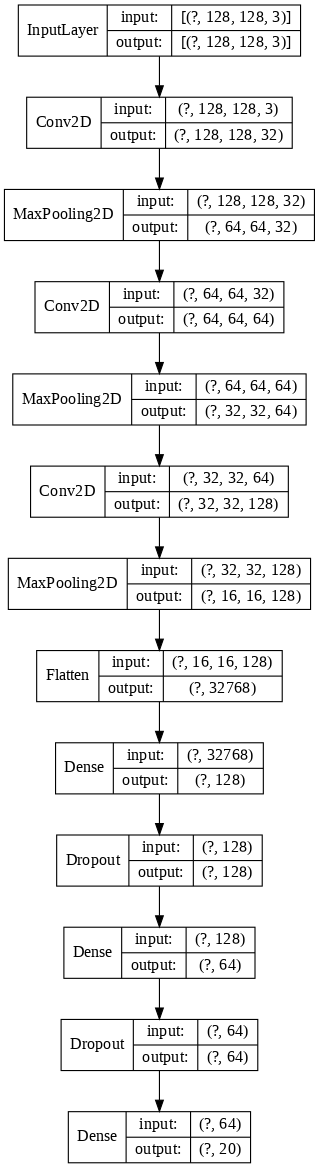

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

def define_model_kustom():
    model = Sequential()

    # 01-Feature Extractor Layer
    model.add(Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(img_size_100p, img_size_100p, 3))) 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # 02-Flatten Layer
    model.add(Flatten())
    
    # 03-Fully Connected Layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5, seed=10))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5, seed=10))
    model.add(Dense(20, activation='softmax'))
    
    # Compile Model
    opt = Adam(lr=0.0003)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = define_model_kustom()
model.summary()
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80)

In [ ]:
os.mkdir("/content/simpan_model") # Buat folder untuk save model report (run 1x aja )

In [ ]:
%%time

import pandas as pd

epochs = 25       
batch_size = 64   

model = define_model_kustom() 


history = model.fit(X_train_norm, 
y_train_encode, epochs=epochs, 
batch_size=batch_size, verbose=1)

Epoch 1/25
109/109 [==============================] - 487s 4s/step - loss: 2.9917 - accuracy: 0.0586
Epoch 2/25
109/109 [==============================] - 485s 4s/step - loss: 2.9157 - accuracy: 0.0817
Epoch 3/25
109/109 [==============================] - 485s 4s/step - loss: 2.6216 - accuracy: 0.1778
Epoch 4/25
109/109 [==============================] - 485s 4s/step - loss: 2.2027 - accuracy: 0.3045
Epoch 5/25
109/109 [==============================] - 486s 4s/step - loss: 1.9336 - accuracy: 0.3773
Epoch 6/25
109/109 [==============================] - 490s 4s/step - loss: 1.6731 - accuracy: 0.4561
Epoch 7/25
109/109 [==============================] - 497s 5s/step - loss: 1.5346 - accuracy: 0.5006
Epoch 8/25
109/109 [==============================] - 499s 5s/step - loss: 1.4072 - accuracy: 0.5368
Epoch 9/25
109/109 [==============================] - 493s 5s/step - loss: 1.3296 - accuracy: 0.5551
Epoch 10/25
109/109 [==============================] - 490s 4s/step - loss: 1.2258 - accura

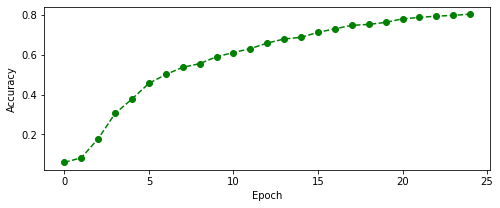

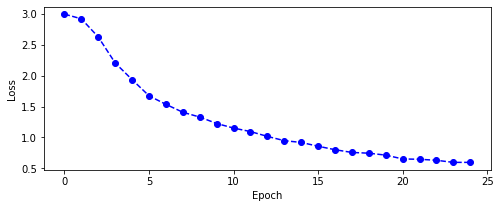

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(history.history['accuracy'], 'og', linestyle='dashed')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(history.history['loss'], 'ob', linestyle='dashed')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
plt.show()

In [ ]:
import pandas as pd

# 01 - Save model as h5
model.save("/content/simpan_model/model_vgg16.h5")

# 02 - Save model report to csv
model_csv = pd.DataFrame(history.history)
csv_file = "/content/simpan_model/model_vgg16.csv"
with open(csv_file, mode="w") as f:
  model_csv.to_csv(f)

In [ ]:
# Load model
from tensorflow.keras.models import load_model
# Masukin deh model lu di mane?
model = load_model('/content/simpan_model/model_vgg16.h5') 
#model.summary()

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# nah ini buat gua kalau mau munculin confusion matrix
encoder             = LabelBinarizer()
y_train_encode_new  = encoder.fit_transform(y_train)
y_test_encode_new   = encoder.fit_transform(y_test)

# ============================================================================ #
# =============================== DATA TESTING =============================== #
# ============================================================================ #

pred        = model.predict(X_test_norm.astype('float32'), verbose=0)
prediksi    = np.argmax(pred, axis=-1) 



#Kalau program lu pake nya Multi class alist softmax, lu pake fungsi ini * np.argmax(model.predict(x), axis=-1) 
#Nah Kalau model elu cuma ada 2 class boleh pake ini sob * (model.predict(x) > 0.5).astype("int32") 


pred_label  = model.predict_classes(X_test_norm, batch_size=64, verbose=0)  # label hasil prediksi
true_label  = np.argmax(y_test_encode_new, axis=-1)                         # label yang sebenarnya

print("Label Prediksi   :", pred_label)
print("Label Sebenarya  :", true_label, "\n")
loss, acc = model.evaluate(X_test_norm, y_test_encode_new, verbose=1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Label Prediksi   : [ 0  0  0 ... 19 16 19]
Label Sebenarya  : [ 0  0  0 ... 19 19 19] 

37/37 [==============================] - 23s 631ms/step - loss: 0.2337 - accuracy: 0.9582


Accuracy : 95.819%
Loss     : 0.234

Classification Report :

              precision    recall  f1-score   support

          Ka       0.94      0.97      0.95        61
          Ga       1.00      0.98      0.99        61
         Nga       0.93      0.93      0.93        61
          Pa       1.00      0.95      0.97        61
          Ba       1.00      1.00      1.00        61
          Ma       0.95      1.00      0.98        61
          Ta       1.00      1.00      1.00        69
          Da       0.97      1.00      0.98        61
          Na       0.88      1.00      0.94        61
          Ca       0.98      1.00      0.99        61
          Ja       0.98      0.98      0.98        61
         Nya       0.98      0.89      0.93        61
          Ya       0.98      0.95      0.97        61
           A       0.93      0.96      0.94        67
          La       0.94      1.00      0.97        61
          Ra       0.97      0.86      0.91        43
          Sa       

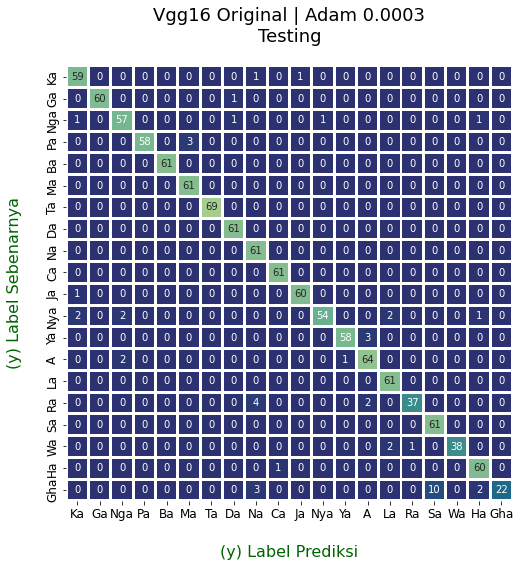

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

target_names = ['Ka', 'Ga', 'Nga', 'Pa', 'Ba', 'Ma', 'Ta', 'Da', 'Na', 'Ca', 'Ja', 'Nya','Ya', 'A', 'La', 'Ra', 'Sa', 'Wa', 'Ha', 'Gha'] 
cmatrix = confusion_matrix(true_label, pred_label)
creport = classification_report(true_label, prediksi, target_names=target_names)

print("Accuracy : {:.3f}%".format(acc*100))
print("Loss     : {:.3f}".format(loss))

print("\nClassification Report :\n")
print(creport)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cmatrix, cmap="crest_r", annot=True, fmt='.4g', linewidths=2, linecolor='white', cbar=False, ax=ax)

ax.set_title('Vgg16 Original | Adam 0.0003\nTesting', fontsize=18, pad=24)  
ax.set_xticklabels(labels=target_names, fontsize=12)
ax.set_yticklabels(labels=target_names, fontsize=12)

plt.xlabel("(y) Label Prediksi", fontsize=16, color="darkgreen", labelpad=24)
plt.ylabel("(y) Label Sebenarnya", fontsize=16, color="darkgreen", labelpad=24)
plt.show()